## NNADIETO CHISOM DAVID

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Lung_cancer_dec"

In [5]:
%cd /content/drive/MyDrive/Lung_cancer_dec

/content/drive/.shortcut-targets-by-id/1NMTeObEmUH9aOC4W10wVV3AQGs0Lmq-Q/Lung_cancer_dec


In [6]:
!ls

c_celss.h5
detecting-lung-cancer-vgg16-resnet-efficientnet.ipynb
eval_result.csv
kaggle.json
lung-and-colon-cancer-histopathological-images.zip
lung_colon_image_set


In [7]:
#import libraries
import os
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers
from keras import layers, models, regularizers
import tensorflow as tf
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [8]:
#datasets
data_1 = '/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets'
data_2 = '/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/colon_image_sets'

In [9]:
# Define a list to hold image features
features = []

# Loop through the first directory of images
for dir in os.listdir(data_1):
    sub_dir = os.path.join(data_1,dir)
    print(sub_dir)
    print('*************')
    # Loop through each image in the subdirectory
    for img in tqdm(os.listdir(sub_dir)):
        # Read the image file and resize it to (70,70)
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)  # Optional: Convert to grayscale
        f = cv2.resize(f , (70,70))
        # Add the image to the list of features
        features.append(f)
        
# Loop through the second directory of images
for dir in os.listdir(data_2):
    sub_dir = os.path.join(data_2,dir)
    print(sub_dir)
    print('*************')
    # Loop through each image in the subdirectory
    for img in tqdm(os.listdir(sub_dir)):
        # Read the image file and resize it to (70,70)
        f = cv2.imread(os.path.join(sub_dir , img))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)  # Optional: Convert to grayscale
        f = cv2.resize(f , (70,70))
        # Add the image to the list of features
        features.append(f)

# Define a list to hold labels for the images
labels = []
i = 0

# Loop through the first directory of images
for dir in os.listdir(data_1):
    sub_dir = os.path.join(data_1,dir)
    print(sub_dir)
    print('*************')
    # Loop through each image in the subdirectory and add its label to the list
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1
    
# Loop through the second directory of images
for dir in os.listdir(data_2):
    sub_dir = os.path.join(data_2,dir)
    print(sub_dir)
    print('*************')
    # Loop through each image in the subdirectory and add its label to the list
    for img in tqdm(os.listdir(sub_dir)):
        labels.append(i)
    i = i + 1

/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [01:59<00:00, 41.77it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [01:44<00:00, 47.69it/s] 


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [01:58<00:00, 42.11it/s] 


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [02:01<00:00, 41.20it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [02:01<00:00, 41.01it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 1123394.04it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 1800748.75it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/lung_image_sets/lung_scc
*************


100%|██████████| 5000/5000 [00:00<00:00, 1424211.88it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/colon_image_sets/colon_aca
*************


100%|██████████| 5000/5000 [00:00<00:00, 1024400.16it/s]


/content/drive/MyDrive/Lung_cancer_dec/lung_colon_image_set/colon_image_sets/colon_n
*************


100%|██████████| 5000/5000 [00:00<00:00, 982180.59it/s]


In [10]:
 # convert image embeddings(features) to arrays
import numpy as np
X = np.array(features)
print(X.shape)

(25000, 70, 70, 3)


In [11]:
# convert labels to arrays
Y = np.array(labels)
print(Y.shape)

(25000,)


In [12]:
Y

array([0, 0, 0, ..., 4, 4, 4])

In [13]:
#Split data to train and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [14]:
#Normalize the pixels with the max pixel
xtrain = xtrain/xtrain.max()
xtest = xtest/xtest.max()

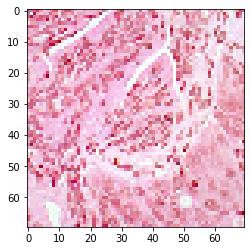

In [15]:
#Randomly visualize an image
plt.imshow(xtrain[15600])
plt.show()

In [16]:
#convert the labels to categorical data using one-hot encoding
ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [17]:
#Define a convolutional neural network model with several convolutional and max pooling layers
model = models.Sequential()

#Add a 2D convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation function
model.add(layers.Conv2D(32 ,(3,3) , padding = 'same' , input_shape = (70,70,3)))
model.add(layers.Activation('relu'))

#Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Add another 2D convolutional layer with 64 filters and ReLU activation function
model.add(layers.Conv2D(64 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))

#Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Add another 2D convolutional layer with 128 filters and ReLU activation function
model.add(layers.Conv2D(128 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))

#Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Add another 2D convolutional layer with 256 filters and ReLU activation function
model.add(layers.Conv2D(256 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))

#Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Add another 2D convolutional layer with 512 filters and ReLU activation function
model.add(layers.Conv2D(512 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))

#Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Add another 2D convolutional layer with 1024 filters and ReLU activation function
model.add(layers.Conv2D(1024 ,(3,3) , padding = 'same'))
model.add(layers.Activation('relu'))

#Add another max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#Flatten the output of the convolutional layers
model.add(layers.Flatten())

#Add a fully connected dense layer with 512 units and ReLU activation function
model.add(layers.Dense(512 , activation='relu' ))

#Add an output layer with 5 units and sigmoid activation function to classify images into 5 categories
model.add(layers.Dense(5, activation='sigmoid') )

In [18]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 activation (Activation)     (None, 70, 70, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 35, 35, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                    

In [19]:
# define evaluation parameters
sgd = tf.keras.optimizers.SGD(0.01)
model.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [20]:
#Train model
model.fit(xtrain,ytrain,
         epochs=20,
         validation_data=(xtest,ytest))

Epoch 1/20
586/586 [==============================] - 27s 23ms/step - loss: 1.2825 - accuracy: 0.4019 - val_loss: 0.9236 - val_accuracy: 0.5512
Epoch 2/20
586/586 [==============================] - 10s 18ms/step - loss: 0.8695 - accuracy: 0.6188 - val_loss: 0.6655 - val_accuracy: 0.8008
Epoch 3/20
586/586 [==============================] - 10s 18ms/step - loss: 0.6868 - accuracy: 0.7038 - val_loss: 0.5768 - val_accuracy: 0.7000
Epoch 4/20
586/586 [==============================] - 10s 18ms/step - loss: 0.5948 - accuracy: 0.7459 - val_loss: 0.4419 - val_accuracy: 0.8331
Epoch 5/20
586/586 [==============================] - 10s 17ms/step - loss: 0.5253 - accuracy: 0.7788 - val_loss: 0.4564 - val_accuracy: 0.8240
Epoch 6/20
586/586 [==============================] - 10s 18ms/step - loss: 0.4411 - accuracy: 0.8178 - val_loss: 0.4828 - val_accuracy: 0.7936
Epoch 7/20
586/586 [==============================] - 11s 18ms/step - loss: 0.4027 - accuracy: 0.8367 - val_loss: 0.3486 - val_accuracy:

In [21]:
#Check model's performance on test set
model.evaluate(xtest,ytest)

196/196 [==============================] - 1s 6ms/step - loss: 0.1097 - accuracy: 0.9634


[0.10966627299785614, 0.9633600115776062]

In [22]:
#labels
cancer_cells = ['lung_aca' , 'lung_scc' , 'lung_n' , 'colon_aca' , 'colon_n']

In [23]:
model.predict(xtest[689].reshape(1,70,70,3))

1/1 [==============================] - 0s 423ms/step


array([[0.9997019 , 0.68162656, 0.85807747, 0.08315635, 0.0015113 ]],
      dtype=float32)

1/1 [==============================] - 0s 31ms/step
Predicted Value- colon_n
Real Value- colon_n


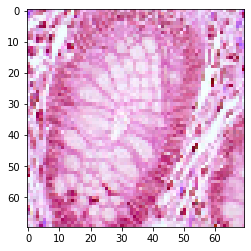

In [24]:
print('Predicted Value-' , cancer_cells[np.argmax(model.predict(xtest[16].reshape(1,70,70,3)))])
print('Real Value-' , cancer_cells[np.argmax(ytest[16])])

plt.imshow(xtest[16])
plt.show()

In [25]:
model.save('c_celss.h5')

In [26]:
# Evaluate the model
y_pred = model.predict(xtest)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)
print('Classification Report:\n', classification_report(y_true, y_pred)) #plot classification report
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred)) #plot confusion matrix
print('F1 Score:', f1_score(y_true, y_pred, average='macro')) #print f1 socre

196/196 [==============================] - 1s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1257
           1       0.99      0.99      0.99      1254
           2       0.92      0.96      0.94      1258
           3       0.96      0.99      0.98      1254
           4       0.99      0.98      0.98      1227

    accuracy                           0.96      6250
   macro avg       0.96      0.96      0.96      6250
weighted avg       0.96      0.96      0.96      6250

Confusion Matrix:
 [[1131    7   99   20    0]
 [  15 1239    0    0    0]
 [  45    0 1213    0    0]
 [   0    2    0 1236   16]
 [   0    0    0   25 1202]]
F1 Score: 0.9633550332276085


In [27]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# load the ResNet50 model
ResNet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

# freeze the weights of the pretrained layers
for layer in ResNet_model.layers:
    layer.trainable = False

# add custom classification layers
x = Flatten()(ResNet_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(5, activation='softmax')(x)

# create the model
res_model = Model(inputs=ResNet_model.input, outputs=output)

# compile the model
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = res_model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))

# evaluate the model
loss, acc = res_model.evaluate(xtest, ytest)
print(f'Test accuracy: {acc:.3f}')


94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
586/586 [==============================] - 25s 34ms/step - loss: 1.1781 - accuracy: 0.4995 - val_loss: 0.9615 - val_accuracy: 0.5910
Epoch 2/20
586/586 [==============================] - 18s 31ms/step - loss: 0.9220 - accuracy: 0.6113 - val_loss: 0.8715 - val_accuracy: 0.6357
Epoch 3/20
586/586 [==============================] - 18s 32ms/step - loss: 0.8406 - accuracy: 0.6432 - val_loss: 0.7852 - val_accuracy: 0.6712
Epoch 4/20
586/586 [==============================] - 18s 30ms/step - loss: 0.7877 - accuracy: 0.6637 - val_loss: 0.7216 - val_accuracy: 0.6946
Epoch 5/20
586/586 [==============================] - 19s 32ms/step - loss: 0.7670 - accuracy: 0.6780 - val_loss: 0.7267 - val_accuracy: 0.6778
Epoch 6/20
586/586 [==============================] - 19s 32ms/step - loss: 0.7375 - accuracy: 0.6894 - val_loss: 0.7325 - val_accuracy: 0.6949
Epoch 7/20
586/586 [==============================] - 17s 30ms/step - l

In [28]:
# Evaluate the model
y_pred = res_model.predict(xtest)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)
print('Classification Report:\n', classification_report(y_true, y_pred)) #plot classification report
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred)) #plot confusion matrix
print('F1 Score:', f1_score(y_true, y_pred, average='macro')) #print f1_score

196/196 [==============================] - 5s 21ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.45      0.57      1257
           1       0.70      0.97      0.82      1254
           2       0.77      0.92      0.84      1258
           3       0.85      0.42      0.56      1254
           4       0.64      0.88      0.75      1227

    accuracy                           0.73      6250
   macro avg       0.75      0.73      0.71      6250
weighted avg       0.75      0.73      0.71      6250

Confusion Matrix:
 [[ 568  376  265   13   35]
 [  15 1219   10    0   10]
 [  70   30 1152    2    4]
 [  54   73   56  521  550]
 [  17   33   15   77 1085]]
F1 Score: 0.705951057769455


In [29]:
from keras.applications import VGG16

# load the pre-trained model
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(70, 70, 3))

# freeze the layers of the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# build the final model by adding a few dense layers on top of the pre-trained model
vgg_model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = vgg_model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))



58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
586/586 [==============================] - 21s 32ms/step - loss: 0.2875 - accuracy: 0.8937 - val_loss: 0.2138 - val_accuracy: 0.9230
Epoch 2/20
586/586 [==============================] - 16s 27ms/step - loss: 0.1565 - accuracy: 0.9388 - val_loss: 0.1284 - val_accuracy: 0.9538
Epoch 3/20
586/586 [==============================] - 17s 29ms/step - loss: 0.1367 - accuracy: 0.9476 - val_loss: 0.1081 - val_accuracy: 0.9595
Epoch 4/20
586/586 [==============================] - 16s 27ms/step - loss: 0.1071 - accuracy: 0.9573 - val_loss: 0.1534 - val_accuracy: 0.9413
Epoch 5/20
586/586 [==============================] - 16s 27ms/step - loss: 0.0917 - accuracy: 0.9649 - val_loss: 0.1479 - val_accuracy: 0.9446
Epoch 6/20
586/586 [==============================] - 17s 29ms/step - loss: 0.0803 - accuracy: 0.9674 - val_loss: 0.1193 - val_accuracy: 0.9576
Epoch 7/20
586/586 [==============================] - 16s 27ms/step - l

In [30]:
# Evaluate the model
y_pred = vgg_model.predict(xtest)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)
print('Classification Report:\n', classification_report(y_true, y_pred)) #plot classification report
print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred)) #plot confusion matric
print('F1 Score:', f1_score(y_true, y_pred, average='macro')) #Print f1 score

196/196 [==============================] - 4s 17ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1257
           1       0.99      1.00      1.00      1254
           2       0.96      0.97      0.97      1258
           3       0.95      0.98      0.96      1254
           4       1.00      0.95      0.97      1227

    accuracy                           0.97      6250
   macro avg       0.97      0.97      0.97      6250
weighted avg       0.97      0.97      0.97      6250

Confusion Matrix:
 [[1197    4   48    8    0]
 [   1 1253    0    0    0]
 [  30    0 1225    3    0]
 [  13    4    4 1231    2]
 [   3    0    0   58 1166]]
F1 Score: 0.9715562568550935


In [31]:
df_model_eval = pd.read_csv("/content/drive/MyDrive/Lung_cancer_dec/eval_result.csv")
df_model_eval.head()

,Model,Accuracy,F1 Score
0,Simple CNN,0.93,0.93
1,ResNet,0.73,0.72
2,VGG16,0.97,0.97
